# ЗАДАЧА ДЛЯ САМОСТОЯТЕЛЬНОГО ПРОЕКТА  
  
Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.  
  
Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

### 4. Статистические модели прогнозирования. Практика

In [2]:
# 1. Прочитайте исходный файл с данными. 
# Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

import pandas as pd
data = pd.read_csv('data/ghana_gdp.csv', parse_dates=["year"], index_col = ["year"])
data.head()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


<AxesSubplot:xlabel='year'>

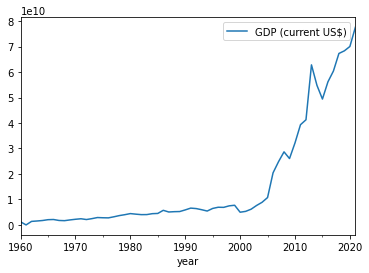

In [3]:
data.plot()

На первый взгляд сезонность не улавливается, но виден тренд увеличения значения ввп.

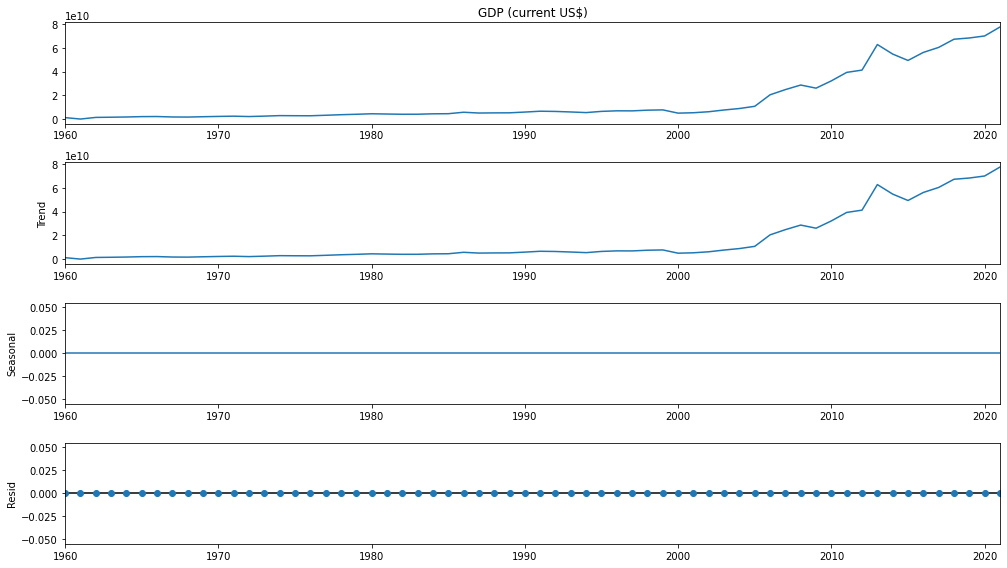

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 14, 8

result = seasonal_decompose(data['GDP (current US$)'], model='additive')
result.plot()
plt.show()

Нет ни сезонности, ни шума. Только тренд

In [14]:
# Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

((59, 1), (3, 1))

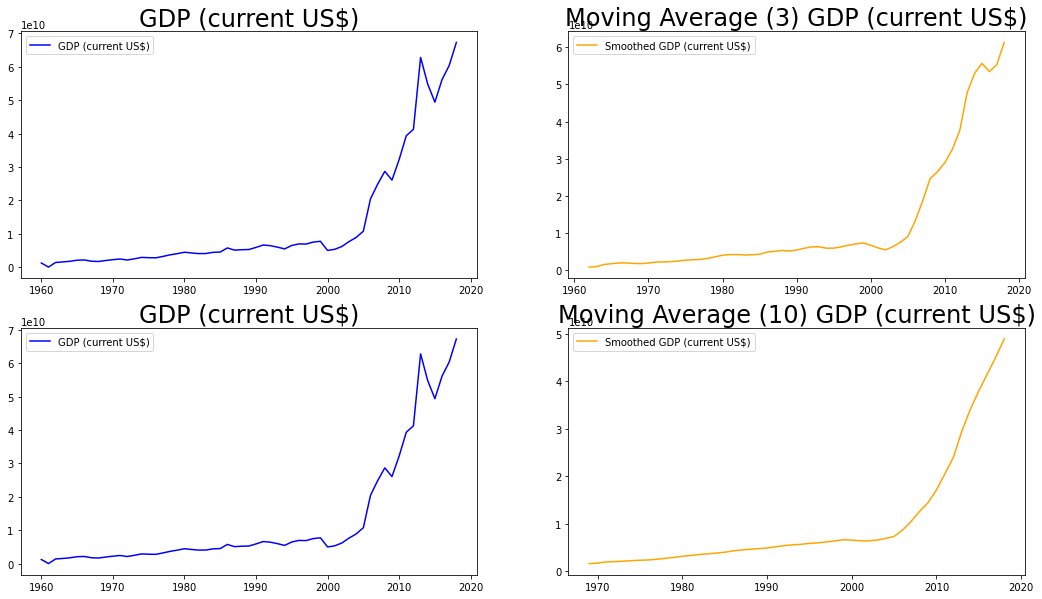

In [28]:
# 2. Постройте модель скользящего среднего, проанализируйте результат. 
# Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. 
# Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Окно в месяц (Window = 30) 
ax[0, 0].plot(train_df['GDP (current US$)'], color = "blue", label = "GDP (current US$)")
ax[0, 0].set_title("GDP (current US$)", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df['GDP (current US$)'].rolling(window=3).mean(), color = "orange", label = "Smoothed GDP (current US$)")
ax[0, 1].set_title("Moving Average (3) GDP (current US$)", size = 24)
ax[0, 1].legend()


# Окно в год (Window = 300)
ax[1, 0].plot(train_df['GDP (current US$)'], color = "blue", label = "GDP (current US$)")
ax[1, 0].set_title("GDP (current US$)", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df['GDP (current US$)'].rolling(window=10).mean(), color = "orange", label = "Smoothed GDP (current US$)")
ax[1, 1].set_title("Moving Average (10) GDP (current US$)", size = 24)
ax[1, 1].legend()
plt.show();


Видим тренд с резким увеличением значения примерно с 2005 года.

In [40]:
# 3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.
# Параметры p и q выберите по коррелограммам ACF и PACF.
# Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

# Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC 
# (или подберите наилучшие параметры с помощью пакета pmdarima, как в скринкасте).

from statsmodels.tsa.stattools import adfuller

test = adfuller(data['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  2.3738393561489173
p-value:  0.9989974617734
Critical values:  {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
ряд нестационарен


In [41]:
# ряд нестационарный, дифференцируем
df_diff1 = data.diff(periods=1).dropna()
test = adfuller(df_diff1['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.5879441118004756
p-value:  0.48964671777435426
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [42]:
# ряд нестационарный, дифференцируем ещё раз
df_diff2 = df_diff1.diff(periods=1).dropna()
test = adfuller(df_diff2['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.7459087628491272
p-value:  0.40762748326075793
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [43]:
# ряд нестационарный, дифференцируем ещё раз
df_diff3 = df_diff2.diff(periods=1).dropna()
test = adfuller(df_diff3['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -5.278476343687454
p-value:  6.066691711555469e-06
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд стационарен


Ряд нестационарен, будет использовать модель ARIMA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


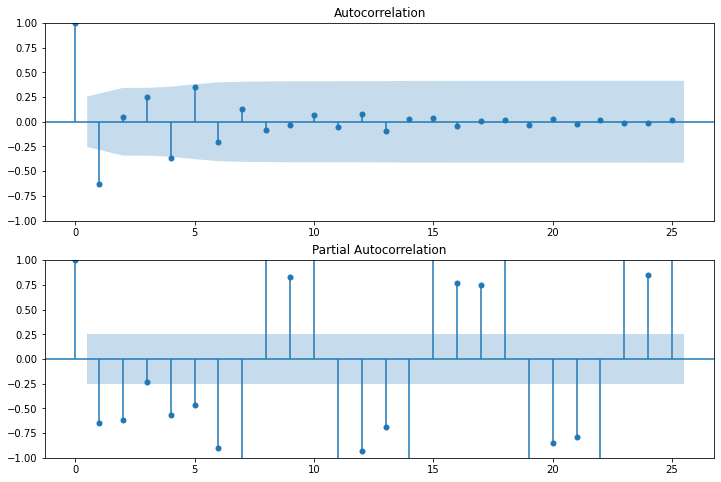

In [45]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff3.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff3, lags=25, ax=ax2)
plt.show();

In [46]:
# По графику частичной корреляции выбираем p=2
# порядок интегрирования d=3
p = 2
d = 3
q = 1

from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df['GDP (current US$)'], order = (p,d,q))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1325.615
Date:                Wed, 01 Mar 2023   AIC                           2659.231
Time:                        22:30:49   BIC                           2667.332
Sample:                    01-01-1960   HQIC                          2662.372
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.129     -5.765      0.000      -0.995      -0.490
ar.L2         -0.4577      0.223     -2.055      0.040      -0.894      -0.021
ma.L1         -0.9730      0.110     -8.808      0.000      -1.189      -0.756
sigma2      3.138e+19   5.16e-22   6.08e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               161.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             392.62   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+56. Standard errors may be unstable.
"""

In [48]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=5,
                         start_P=0, seasonal=False,
                         d=3, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (5) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2670.910, Time=0.02 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2734.956, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2707.192, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=2682.371, Time=0.01 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2659.231, Time=0.01 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2679.050, Time=0.01 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2660.791, Time=0.02 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2676.883, Time=0.02 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2666.241, Time=0.02 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.338 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1325.615
Date:                Wed, 01 Mar 2023   AIC                           2659.231
Time:                        22:34:17   BIC                           2667.332
Sample:                    01-01-1960   HQIC                          2662.372
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.129     -5.765      0.000      -0.995      -0.490
ar.L2         -0.4577      0.223     -2.055      0.040      -0.894      -0.021
ma.L1         -0.9730      0.110     -8.808      0.000      -1.189      -0.756
sigma2      3.138e+19   5.16e-22   6.08e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               161.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             392.62   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+56. Standard errors may be unstable.
"""

Получили лучшую модель ARIMA(2,3,1)

In [59]:
# 4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).
arima_model = ARIMA(train_df['GDP (current US$)'], order = (2,3,1))
arima_model_fit = arima_model.fit()

pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = arima_model_fit.predict(start = test_df.index[0], end = test_df.index[-1])


pred_df["GDP"] = data["GDP (current US$)"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP (current US$)"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP (current US$)"]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


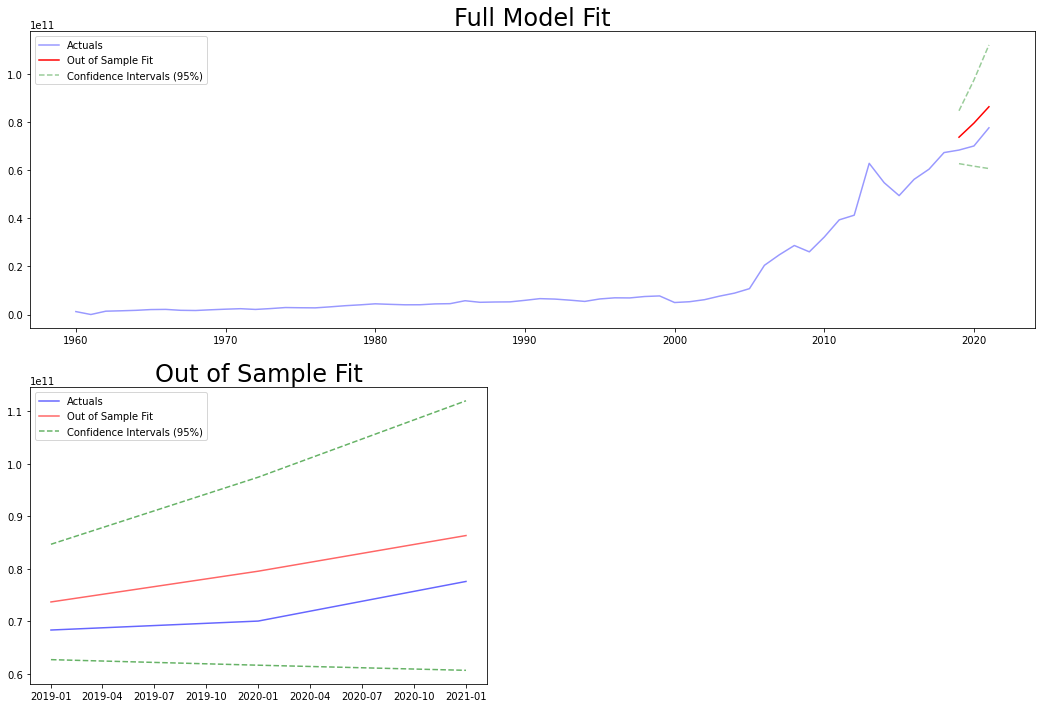

In [62]:
# 5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, 
# а также 95%-ый доверительный интервал для прогноза.

plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

Модель сделала неплохое предсказание, истинное значение ВВП входит в доверительный интервал.   
AIC = 	2659.231

### 6. Интерполяция и сэмплирование. Практика

In [65]:
# 1. Проверьте данные на наличие пропущенных дат
data.asfreq(freq='AS').isnull().sum()

GDP (current US$)    0
dtype: int64

In [66]:
# 2. Проверьте данные на наличие пропущенных значений (Series.isna().sum())
data["GDP (current US$)"].isna().sum()

0

In [67]:
mask = data["GDP (current US$)"]==0
data[mask]

,GDP (current US$)
year,
1961-01-01,0.0


In [68]:
# 3. Обратите внимание, что иногда пропуски в данных могут быть заполнены нулями. 
# Сделайте проверку на наличие нулевых значений и в случае нахождения замените их на NaN. Воспользуйтесь кодом ниже:
# import numpy as np
# data['GDP (current US$)'] = data['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)

# проверяем, есть ли нулевые значения
mask = data["GDP (current US$)"]==0
data[mask]

,GDP (current US$)
year,
1961-01-01,0.0


In [69]:
# нулевое значение есть, преобразовываем
import numpy as np
data['GDP (current US$)'] = data['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)

In [74]:
# 4. Для заполнения пропусков выполните интерполяцию с использованием метода .interpolate().
data['GDP (current US$)'] = data['GDP (current US$)'].interpolate(method='linear')

In [77]:
# 5. Проверьте полученный ряд на стационарность, определите параметры модели (ARIMA/ARMA) и запустите модель.
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

# проверяем на стационарность
test = adfuller(data['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')


adf:  2.3808487575556314
p-value:  0.99900101016983
Critical values:  {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
ряд нестационарен


In [78]:
# ряд нестационарный, дифференцируем
df_diff1 = data.diff(periods=1).dropna()
test = adfuller(df_diff1['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.739718489292148
p-value:  0.41077316906677686
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [79]:
# ряд нестационарный, дифференцируем ещё раз
df_diff2 = df_diff1.diff(periods=1).dropna()
test = adfuller(df_diff2['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.7042548913504083
p-value:  0.42892157301176825
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [80]:
# ряд нестационарный, дифференцируем ещё раз
df_diff3 = df_diff2.diff(periods=1).dropna()
test = adfuller(df_diff3['GDP (current US$)'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -5.456208629828453
p-value:  2.5783244972042664e-06
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд стационарен


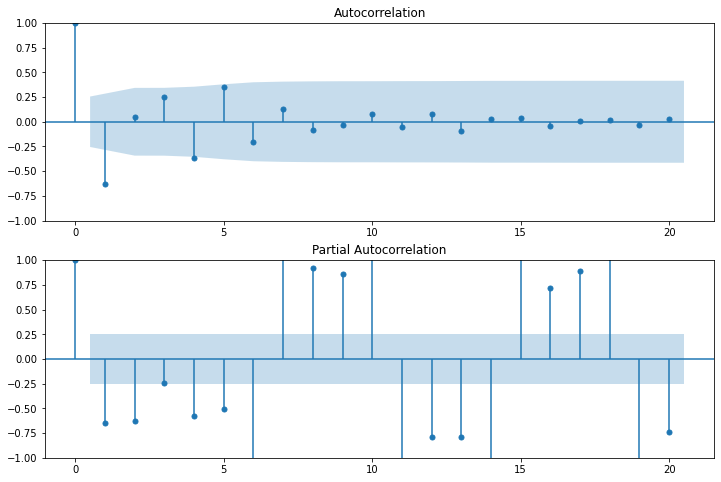

In [88]:
# строим графики автокорреляции  и частичной автокорреляции
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff3.values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff3, lags=20, ax=ax2)
plt.show();

In [89]:
# выбираем значение p=2
# d = 3
# то есть параметры остались прежними

p = 2
d = 3
q = 1

arima_model = ARIMA(train_df['GDP (current US$)'], order = (p,d,q))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1325.613
Date:                Wed, 01 Mar 2023   AIC                           2659.226
Time:                        23:46:44   BIC                           2667.328
Sample:                    01-01-1960   HQIC                          2662.367
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7420      0.129     -5.756      0.000      -0.995      -0.489
ar.L2         -0.4585      0.223     -2.056      0.040      -0.895      -0.022
ma.L1         -0.9729      0.110     -8.806      0.000      -1.189      -0.756
sigma2      3.139e+19   4.77e-22   6.58e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               163.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):             440.85   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.47e+55. Standard errors may be unstable.
"""

6. Изменился ли AIC критерий построенной модели по сравнению с моделью на неинтерполированных данных? Сделайте вывод.

После интерполяции выявили такие же значения параметров для модели ARIMA, как и до интерполяции.  
Значение AIC совсем немного снизилось и равно 2659.226 (было 2659.231), отсюда можно сделать вывод, что новая модель лучше.

### 9. Модели прогнозирования гетероскедастичности. Валидация временных рядов. Практика

In [90]:
# Посчитайте волатильность для вашего временного ряда.
data["gdp_vol"] = data['GDP (current US$)'].pct_change(1).mul(100).abs()
data["gdp_vol"].head()

year
1960-01-01          NaN
1961-01-01     6.789413
1962-01-01     6.357759
1963-01-01    11.448835
1964-01-01    12.363636
Name: gdp_vol, dtype: float64

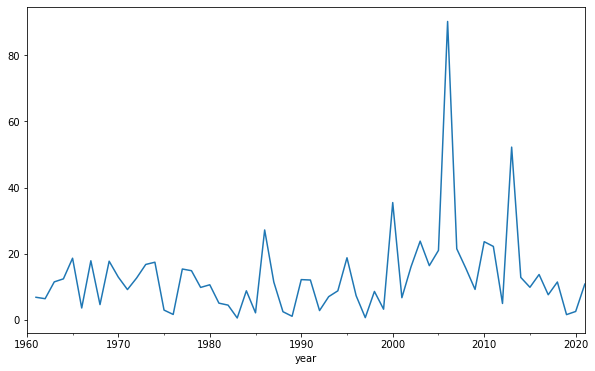

In [94]:
plt.figure(figsize=(10,6))
data["gdp_vol"].plot();

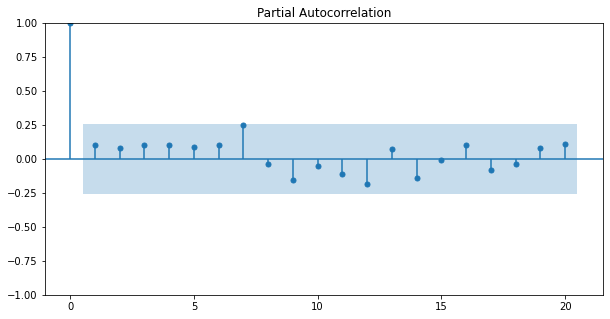

In [98]:
# 2. Используйте GARCH-модель для предсказания волатильности.
import statsmodels.graphics.tsaplots as sgt

train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]


plt.rcParams["figure.figsize"] = 10, 5
sgt.plot_pacf(train_df.gdp_vol[1:], lags = 20)
plt.show();

In [99]:
adfuller(train_df.gdp_vol[1:])

(-6.725311059553779,
 3.4014596148856493e-09,
 0,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 382.739595975669)

ряд стационарен

In [101]:
garch_df = pd.DataFrame(data["gdp_vol"].loc[data.index]) 
garch_df.loc[train_df.index, "gdp_vol"] = train_df["gdp_vol"].dropna()

from arch import arch_model
model = arch_model(garch_df["gdp_vol"].dropna(), p = 3, q = 1, vol = "GARCH")

model_results = model.fit(last_obs = test_df.index[0], update_freq = 5)

Iteration:      5,   Func. Count:     37,   Neg. LLF: 229.92406029122347
Iteration:     10,   Func. Count:     72,   Neg. LLF: 226.59784200551272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.59781234014343
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12


In [102]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                gdp_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -226.598
Distribution:                  Normal   AIC:                           465.196
Method:            Maximum Likelihood   BIC:                           477.558
                                        No. Observations:                   58
Date:                Thu, Mar 02 2023   Df Residuals:                       57
Time:                        22:41:56   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            12.3191      1.916      6.431  1.266e-10 [  8.565, 16.074]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.6704     19.832      0.185      0.853 [-35.199, 42.540]
alpha[1]       0.0000  8.141e-02      0.000      1.000 [ -0.160,  0.160]
alpha[2]       0.0000  9.087e-02      0.000      1.000 [ -0.178,  0.178]
alpha[3]       0.0000  8.259e-02      0.000      1.000 [ -0.162,  0.162]
beta[1]        1.0000      0.137      7.294  3.010e-13 [  0.731,  1.269]
========================================================================

Covariance estimator: robust
"""

In [103]:
# 3. Используйте линейную регрессию для получения прогноза.
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(data['gdp_vol'].shape[0]))[:train_df.shape[0]].fillna(0)
X_test = pd.DataFrame(range(data['gdp_vol'].shape[0]))[train_df.shape[0]:].fillna(0)
y_train = train_df['gdp_vol'].fillna(0)
y_test = test_df['gdp_vol'].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

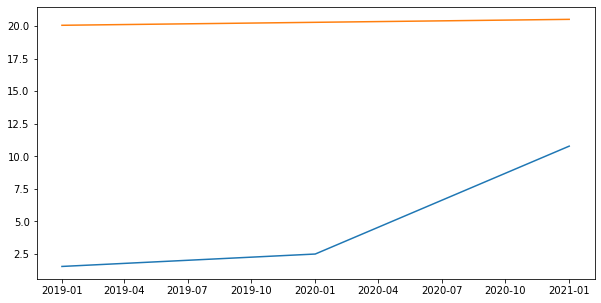

In [104]:
# 4-6
# Визуализируйте полученное предсказание вместе с фактическим значением.
# Сравните результаты и сделайте выводы.
# Почему результат модели GARCH получился именно таким?

plt.plot(y_test)
plt.plot(pd.Series(lr_predict, index=y_test.index))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


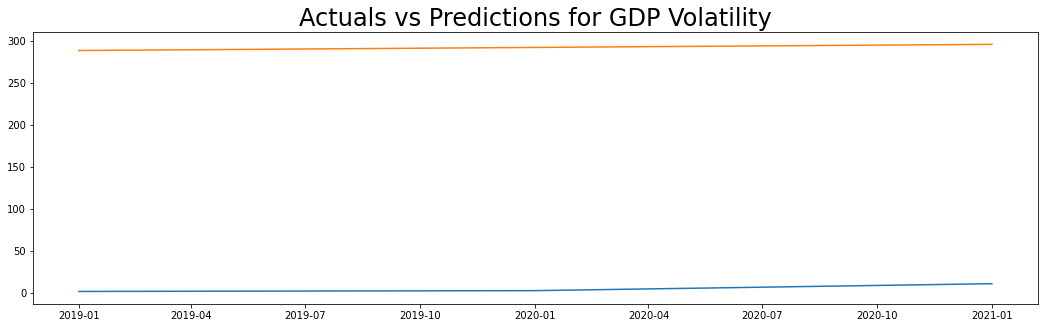

In [106]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[test_df.index] 

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["gdp_vol"].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for GDP Volatility", size = 24)

plt.show();

In [111]:
import numpy as np
from sklearn.metrics import mean_squared_error
# метрика RMSE для модели GARCH
print("RMSE GARCH: ")
np.sqrt(mean_squared_error(predictions_df["gdp_vol"].abs(), predictions_df["Predictions"]))

RMSE GARCH: 


287.30621636740847

In [112]:
# метрика RMSE для модели LinearRegression
print("RMSE LR: ")
np.sqrt(mean_squared_error(y_test, lr_predict))

RMSE LR: 


15.855880226739636

Модель не уловила дисперсию, спрогнозировала значения очень сильно отличающиеся от действительных. Линейная регрессия в данном случае показала лучший результат (в сравнении с моделью GARCH)